# gradient boosting machine with python
Qiudong Deng
qddeng@gmail.com

In [1]:
#set wd

import os
os.getcwd()
os.chdir('E:/2016 spring course/msa 8150/final project proposal')
os.getcwd()

# import modules
import pandas as pd
import numpy as np
import subprocess

#read data in-1
#data from https://archive.ics.uci.edu/ml/machine-learning-databases/
df = pd.read_csv("adult with col names with na.csv", index_col=0)
#list(df)

In [2]:
ncol = len(df.axes[1])
nrow=len(df.axes[0])
print("%s x %s" % (nrow, ncol)) #check dimension 
print (df.dtypes) #check data types

# count freq
#df.groupby('y').count()

#convert object col to int64 and rename-2
n = ncol
for i in range(0,n):
       if (df.iloc[:,i].dtype==object):
        A= df.iloc[:,i].unique()
        map_to_int = {name: n for n, name in enumerate(A)}
        df.iloc[:,i] = df.iloc[:,i].replace(map_to_int)
print (df.dtypes)


#first n-1col as features, and the last one as target
df1=df.iloc[:,0:n]
features = list(df1.columns[:(n-1)])
print("* features:", features, sep="\n")
df1.rename(columns={'y':'Target'}, inplace=True)
#list(df1)
#df1

y = df1["Target"]
X = df1[features]
#split data to train and test-3
from sklearn.cross_validation import train_test_split

train, test = train_test_split(df1, test_size = 0.5)

#using train set to construct tree-4
y = train["Target"]
X = train[features]

32561 x 15
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
y                 object
dtype: object
age               int64
workclass         int64
fnlwgt            int64
education         int64
education-num     int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int64
y                 int64
dtype: object
* features:
['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']


In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pylab as plt
%matplotlib inline

In [4]:
#http://scikit-learn.org/stable/modules/ensemble.html


# build a classifier
clf = GradientBoostingClassifier()

clf.fit(X, y)

from sklearn import datasets
from sklearn import metrics   
expected = test["Target"]
X1 = test[features]
predicted1 = clf.predict(X1)

print(metrics.classification_report(expected, predicted1))
print(metrics.confusion_matrix(expected, predicted1))

# roc1 
probas1_ = clf.fit(X, y).predict_proba(X1)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate1, true_positive_rate1, thresholds = roc_curve(expected, probas1_[:, 1])
roc_auc1 = auc(false_positive_rate1, true_positive_rate1)
roc_auc1

             precision    recall  f1-score   support

          0       0.88      0.95      0.91     12374
          1       0.79      0.58      0.67      3907

avg / total       0.86      0.86      0.86     16281

[[11773   601]
 [ 1628  2279]]


0.91777477350500303

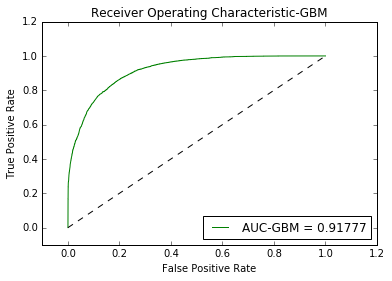

In [5]:
%matplotlib inline
plt.title('Receiver Operating Characteristic-GBM')
plt.plot(false_positive_rate1, true_positive_rate1, 'g',
label='AUC-GBM = %0.5f'% roc_auc1)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Feature ranking:
1. feature 10 (0.159205)
2. feature 11 (0.120050)
3. feature 4 (0.119212)
4. feature 0 (0.110406)
5. feature 5 (0.096623)
6. feature 6 (0.089830)
7. feature 7 (0.088544)
8. feature 12 (0.064985)
9. feature 2 (0.053335)
10. feature 1 (0.050400)
11. feature 9 (0.015320)
12. feature 13 (0.013230)
13. feature 3 (0.011336)
14. feature 8 (0.007525)


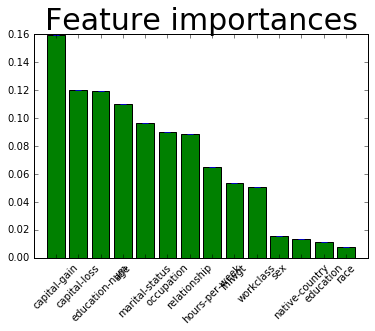

In [6]:
# Plot feature importance

clf = GradientBoostingClassifier()

clf.fit(X, y)


%matplotlib inline
#new label
features_name = np.array(X.columns.values)
features_name

importances = clf.feature_importances_
std = np.std([clf.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances 
plt.figure()
plt.title("Feature importances",size=30)
plt.bar(range(X.shape[1]), importances[indices],
      yerr=std[indices], color='g' , align="center")
plt.xticks(range(X.shape[1]), features_name[indices],rotation=45,fontsize = 10)
plt.xlim([-1, X.shape[1]])
plt.show()
